##### Master Degree in Computer Science and Data Science for Economics

# Simple RNN
## Example of using RNN for classification

### Alfio Ferrara

In [1]:
import nlp.sequencedata as sd 
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
folder = '../'
classification_path = '{}/data/roman_number-classification.csv'.format(folder)
prediction_path = '{}/data/roman_number-prediction.csv'.format(folder)
classification_test = '{}/data/roman_number-classification-test.csv'.format(folder)
prediction_test = '{}/data/roman_number-prediction-test.csv'.format(folder)
classification_dataset = sd.SequenceDataset(data_path=classification_path, task_type='classification')
prediction_dataset = sd.SequenceDataset(data_path=prediction_path, task_type='next_token')
classification_test_dataset = sd.SequenceDataset(data_path=classification_test, task_type='classification')
prediction_test_dataset = sd.SequenceDataset(data_path=prediction_test, task_type='next_token')

In [3]:
batch_size = 6
classification_loader = DataLoader(classification_dataset, batch_size=batch_size, shuffle=True)
classification_test_loader = DataLoader(classification_test_dataset, batch_size=batch_size, shuffle=True)
prediction_loader = DataLoader(prediction_dataset, batch_size=batch_size, shuffle=True)
prediction_test_loader = DataLoader(prediction_test_dataset, batch_size=batch_size, shuffle=True)

### Non sequential classification

In [4]:
import matplotlib.pyplot as plt
import nlp.sequencelearning as sl 
import torch 
import numpy as np 
from sklearn.metrics import classification_report

In [5]:
seq_no_rnn, seq_no_rnn_h = sl.training(
    sl.SequenceClassifierNonRNN, classification_dataset, classification_loader,
    epochs=30
)

100%|██████████| 30/30 [00:00<00:00, 34.00it/s]


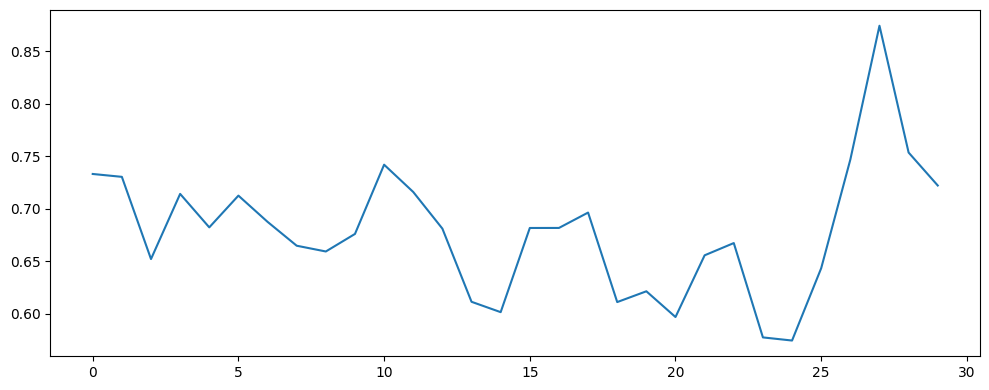

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(seq_no_rnn_h)
plt.tight_layout()
plt.show()

In [7]:
test_data_loader = classification_loader
with torch.no_grad():
    y_true, y_pred = [], []
    for i, (batch_sequences, batch_labels) in enumerate(test_data_loader):
        y_true.extend([int(x) for x in list(batch_labels)])
        y_pred.extend([int(np.argmax(p).detach().numpy()) for p in seq_no_rnn(batch_sequences)])

In [8]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       505
           1       0.61      0.53      0.57       495

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000



### Sequential classification

In [9]:
seq_rnn, seq_rnn_h = sl.training(
    sl.SequenceClassifierRNN, classification_dataset, classification_loader,
    epochs=30
)

100%|██████████| 30/30 [00:02<00:00, 13.33it/s]


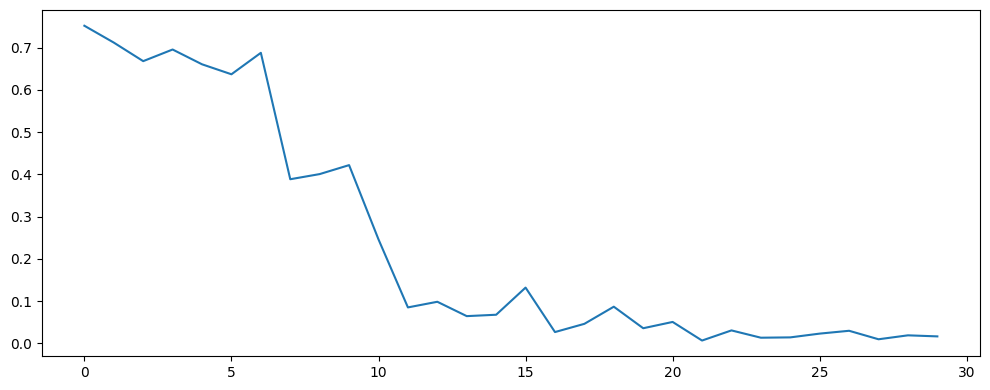

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(seq_rnn_h)
plt.tight_layout()
plt.show()

In [11]:
test_data_loader = classification_loader
with torch.no_grad():
    y_true, y_pred = [], []
    for i, (batch_sequences, batch_labels) in enumerate(test_data_loader):
        y_true.extend([int(x) for x in list(batch_labels)])
        y_pred.extend([int(np.argmax(p).detach().numpy()) for p in seq_rnn(batch_sequences)])

In [12]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

